<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Preparation" data-toc-modified-id="0.-Preparation-0">0. Preparation</a></span><ul class="toc-item"><li><span><a href="#0.1-Install-/-Load-Packages" data-toc-modified-id="0.1-Install-/-Load-Packages-0.1">0.1 Install / Load Packages</a></span></li><li><span><a href="#2.3-Swap-test" data-toc-modified-id="2.3-Swap-test-0.2">2.3 Swap test</a></span><ul class="toc-item"><li><span><a href="#2.3.1-The-procedure-of-the-Swap-Test" data-toc-modified-id="2.3.1-The-procedure-of-the-Swap-Test-0.2.1">2.3.1 The procedure of the Swap Test</a></span></li><li><span><a href="#2.3.2-The-quantum-circuit-of-the-Swap-test" data-toc-modified-id="2.3.2-The-quantum-circuit-of-the-Swap-test-0.2.2">2.3.2 The quantum circuit of the Swap test</a></span></li><li><span><a href="#Exercise-3.1:-Swap-test" data-toc-modified-id="Exercise-3.1:-Swap-test-0.2.3">Exercise 3.1: Swap test</a></span></li><li><span><a href="#Exercise-3.2:-Swap-test" data-toc-modified-id="Exercise-3.2:-Swap-test-0.2.4">Exercise 3.2: Swap test</a></span></li><li><span><a href="#Exercise-3.3:-Swap-test" data-toc-modified-id="Exercise-3.3:-Swap-test-0.2.5">Exercise 3.3: Swap test</a></span></li></ul></li><li><span><a href="#2.4-Hadamard-test" data-toc-modified-id="2.4-Hadamard-test-0.3">2.4 Hadamard test</a></span><ul class="toc-item"><li><span><a href="#2.4.1-The-procedure-of-the-Hadamard-test" data-toc-modified-id="2.4.1-The-procedure-of-the-Hadamard-test-0.3.1">2.4.1 The procedure of the Hadamard test</a></span></li><li><span><a href="#2.3.2-The-quantum-circuit-of-the-Hadamard-Test" data-toc-modified-id="2.3.2-The-quantum-circuit-of-the-Hadamard-Test-0.3.2">2.3.2 The quantum circuit of the Hadamard Test</a></span></li><li><span><a href="#Exercise-4.1:-Hadamard-test" data-toc-modified-id="Exercise-4.1:-Hadamard-test-0.3.3">Exercise 4.1: Hadamard test</a></span></li><li><span><a href="#Exercise-4.2:-Hadamard-test" data-toc-modified-id="Exercise-4.2:-Hadamard-test-0.3.4">Exercise 4.2: Hadamard test</a></span></li></ul></li></ul></li></ul></div>

# 0. Preparation

## 0.1 Install / Load Packages
- We need to install or load packages before running the code below.

In [ ]:
# Install packages

#!pip install numpy
#!pip install qiskit
#!pip install qiskit[visualization]
#!pip install matplotlib

In [ ]:
# Load packages
## General tools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi

## Qiskit Circuit Functions
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *

In [ ]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [ ]:
# IBMQ.save_account(TOKEN)
# provider = IBMQ.load_account()
provider = IBMQ.load_account() # Load account from disk

In [ ]:
# # Get the list of backends available
# provider.backends()

In [ ]:
# Retrieve IBM Quantum device information
backend_overview()

## 2.3 Swap test
 - The swap test is a procedure in quantum computation that is used to check how much two quantum states differ.
 - The swap test takes two input states $\vert\phi\rangle$ and $\vert\psi\rangle$ and outputs a probability with $Pr(\vert0\rangle)=\frac{1}{2}+\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$. This allows us to estimate the squared inner product between the two states, $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$.
 - The squared inner product of the two states roughly measures "overlap" between the two states, and can be used in linear-algebraic applications, including clustering quantum states.
 - When two qubits $\phi$ and $\psi$ are orthogonal, then $\big\vert\langle\psi\vert\phi\rangle\big\vert^2=0$.  
 - Link: [Wikipedia - Swap test](https://en.wikipedia.org/wiki/Swap_test)

### 2.3.1 The procedure of the Swap Test

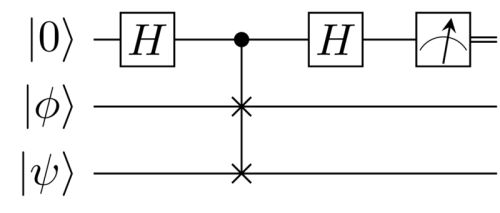

- **Step 1**: We initialize the quantum circuit with the qubit state of $|0, \phi, \psi\rangle$, where $|0\rangle$ is the measuring qubit, and both $|\phi\rangle$ and $|\psi\rangle$ are two $m$-qubit states.

- **Step 2**: We apply the H-gate on the measuring qubit, followed by controlled-SWAP gate (CSWAP-gate) with controlling $|0\rangle$ and targeting two qubits $|\phi\rangle$ and $|\psi\rangle$, and followed by the H-gate on the measuring qubit.

- **Step 3**: Lastly, we measure the measuring qubit to get $Pr(|0\rangle)$ or $Pr(|1\rangle)$ to estimate $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$.    

| Observable           | Measurement value                                                        |
|:--------------------:|:------------------------------------------------------------------------:|
| $Pr(\vert0\rangle)$  | $\frac{1}{2}+\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$ |
| $Pr(\vert1\rangle)$  | $\frac{1}{2}-\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$ |
| $\langle Z \rangle$  | $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$                        |

### 2.3.2 The quantum circuit of the Swap test
- Let's creat a quantum circuit of the Superdense Coding Protocol.

- First, perform a Swap test between $|0\rangle$ and $|0\rangle$.

In [ ]:
## Create a Swap test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
phi = QuantumRegister(size = num_mqubit, name = 'phi')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_swap1 = QuantumCircuit(q, phi, psi, c)
########## FILL YOUR CODE IN HERE ##########


########## ---------------------- ##########

qc_swap1.draw(output = 'mpl')

In [ ]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap1 = execute(qc_swap1, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap1 = job_swap1.result().get_counts()

# print the result
print("Counts: ", counts_swap1)
print("Estimated the Squared inner product: ", str(2*(counts_swap1['0']/num_shots) - 1))
print("Estimated <Z> expectation: ", (counts_swap1['0']/num_shots))
plot_histogram(counts_swap1)

- Second, perform a Swap test between $|0\rangle$ and $|1\rangle$.

In [ ]:
## Create a Swap test quantum circuit.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
phi = QuantumRegister(size = num_mqubit, name = 'phi')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
########## FILL YOUR CODE IN HERE ##########


########## ---------------------- ##########

qc_swap2.draw(output = 'mpl')

In [ ]:
## Let's see the result of the swap test

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap2 = execute(qc_swap2, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap2 = job_swap2.result().get_counts()

# print the result
print("Counts: ", counts_swap2)
print("Estimated the squared inner product: ", str(2*(counts_swap2['0']/num_shots) - 1))
print("Estimated <Z> expectation: ", (counts_swap2['0']/num_shots)-(counts_swap2['1']/num_shots))
plot_histogram(counts_swap2)

### Exercise 3.1: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    1) $|\phi\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle+|1\rangle\bigl)}$ and $|\psi\rangle = \alpha|0\rangle+\beta|1\rangle$, such that $|\alpha|^2 = 0.75$, and $|\beta|^2 = 0.25$

In [ ]:
# Exercise 3.1) circuit
def qc_swap_ex3_1():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    
    ## Gate operation
    
    ## Measurement
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_1().draw(output='mpl')

In [ ]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_1 = execute(qc_swap_ex3_1(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_1 = job_swap_ex3_1.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_1)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_1['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_1.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_1['0']/num_shots)
elif '0' not in list(counts_swap_ex3_1.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_1['0']/num_shots - counts_swap_ex3_1['1']/num_shots))
plot_histogram(counts_swap_ex3_1)

### Exercise 3.2: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    2) Two Bell states: $|\phi\rangle = \frac{1}{\sqrt{2}}{\bigl(|00\rangle+|11\rangle\bigl)}$ and $|\psi\rangle = \frac{1}{\sqrt{2}}{\bigl(|01\rangle+|10\rangle\bigl)}$

In [ ]:
# Exercise 3.2)
def qc_swap_ex3_2():
    # Create a quantum register with 3 qubits
    num_m_qubit = 2
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    
    ## Gate operation

    ## Measurement

    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_2().draw(output='mpl')

In [ ]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_2 = execute(qc_swap_ex3_2(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_2 = job_swap_ex3_2.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_2)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_2['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_2.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_2['0']/num_shots)
elif '0' not in list(counts_swap_ex3_2.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_2['0']/num_shots - counts_swap_ex3_2['1']/num_shots))
plot_histogram(counts_swap_ex3_2)

### Exercise 3.3: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    3) Two GHZ states:
    - $|\phi\rangle = \alpha|000\rangle+\beta|111\rangle$, with $|\alpha|^2 = 0.75$, and $|\beta|^2 = 0.25$
    - $|\psi\rangle = \alpha|000\rangle+\beta|111\rangle$, with $|\alpha|^2 = 0.25$, and $|\beta|^2 = 0.75$

In [ ]:
# Exercise 3.3)
def qc_swap_ex3_3():
    # Create a quantum register with 3 qubits
    num_m_qubit = 3
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization

    ## Gate operation
    
    ## Measurement
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_3().draw(output='mpl')

In [ ]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_3 = execute(qc_swap_ex3_3(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_3 = job_swap_ex3_3.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_3)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_3['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_3.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_3['0']/num_shots)
elif '0' not in list(counts_swap_ex3_3.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_3['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_3['0']/num_shots - counts_swap_ex3_3['1']/num_shots))
plot_histogram(counts_swap_ex3_3)

## 2.4 Hadamard test
 - Let $U$ be a unitary gate acting on the space of m-qubit state $|\psi\rangle$.
     - $U^{\dagger}U=UU^{\dagger}=I$, and $\langle\psi|\psi\rangle=1$
 - The Hadamard test is a method used in quantum computation used to create a random variable whose expected value is the expected real part $Re(\langle\psi\vert U \vert\psi\rangle)$.
 - That is, the Hadamard test produces a random variable whose image is in $\bigl\{+1, -1\bigl\}$ and whose expected value is exactly $Re(\langle\psi\vert U \vert\psi\rangle)$. 
 - With modification of the quantum circuit of the Hadamard test, you can also produce a random variable whose expected value is $Im(\langle\psi\vert U \vert\psi\rangle)$.
 - Link: [Wikipedia - Hadamard test](https://en.wikipedia.org/wiki/Hadamard_test_(quantum_computation))

### 2.4.1 The procedure of the Hadamard test

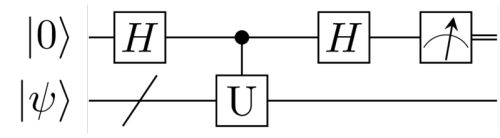

- **Step 1**: We initialize the quantum circuit with the qubit state of $|0\rangle|\psi\rangle$, where $|0\rangle$ is the measuring qubit, and $|\psi\rangle$ is a $m$-qubit state.

- **Step 2**: We apply the H-gate on the measuring qubit, followed by controlled-Unitary gate (C-U gate) with controlling $|0\rangle$ and the target qubit $|\psi\rangle$, and followed by the H-gate on the measuring qubit.

- **Step 3**: Lastly, we measure $\langle Z \rangle$ to get $Re(\langle\psi\vert U \vert\psi\rangle)$.
    - $\langle Z \rangle = (1)\times Pr(|0\rangle)+(-1)\times Pr(|1\rangle)$

- By the circuit diagram, we have our state vector from:
    - $|\Phi_0\rangle = |0\rangle \otimes |\psi\rangle$ $\mapsto$ $\cdots$ $\mapsto$ $|\Phi_f\rangle = \frac{1}{2}{\bigl( |0\rangle(I+U)|\psi\rangle + |1\rangle(I-U)|\psi\rangle \bigl)}$
    
| Observable           | Measurement value                                                   |
|:--------------------:|:-------------------------------------------------------------------:|
| $Pr(\vert0\rangle)$  | $\frac{1}{2}{\big[1+Re(\langle\psi\vert U \vert\psi\rangle)\big]}$  |
| $Pr(\vert1\rangle)$  | $\frac{1}{2}{\big[1-Re(\langle\psi\vert U \vert\psi\rangle)\big]}$  |
| $\langle Z \rangle$  | $Re(\langle\psi\vert U \vert\psi\rangle)$                           |

### 2.3.2 The quantum circuit of the Hadamard Test
- Let's creat a quantum circuit of the Hadamard test.

- First, perform a Hadamard test with $|\psi\rangle = |0\rangle$, and $U=X$

In [ ]:
## Create a Hadamard test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_hada1 = QuantumCircuit(q, psi, c)
########## FILL YOUR CODE IN HERE ##########


########## ---------------------- ##########

qc_hada1.draw(output = 'mpl')

In [ ]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada1 = execute(qc_hada1, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada1 = job_hada1.result().get_counts()

# print the result
print("Counts: ", counts_hada1)
if '1' not in list(counts_hada1.keys()):
    print("Estimated <Z> expectation: ", counts_hada1['0']/num_shots)
elif '0' not in list(counts_hada1.keys()):
    print("Estimated <Z> expectation: ", counts_hada1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada1['0']/num_shots - counts_hada1['1']/num_shots))
plot_histogram(counts_hada1)

- Second, perform a Hadamard test with $|\psi\rangle = |+\rangle=\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big)$, and $U=X$

In [ ]:
## Create a Hadamard test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_hada2 = QuantumCircuit(q, psi, c)
########## FILL YOUR CODE IN HERE ##########


########## ---------------------- ##########

qc_hada2.draw(output = 'mpl')

In [ ]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada2 = execute(qc_hada2, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada2 = job_hada2.result().get_counts()

# print the result
print("Counts: ", counts_hada2)
if '1' not in list(counts_hada2.keys()):
    print("Estimated <Z> expectation: ", counts_hada2['0']/num_shots)
elif '0' not in list(counts_hada2.keys()):
    print("Estimated <Z> expectation: ", counts_hada2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada2['0']/num_shots - counts_hada2['1']/num_shots))
plot_histogram(counts_hada2)

### Exercise 4.1: Hadamard test

- Perform the Hadamard test with given quantum state $\psi\rangle$ and the unitary gate $U$. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    1) Perform a Hadamard test with $|\psi\rangle = |1\rangle$, and $U=R_{z}(\pi/2)$ to get the estimated $Re\big(\langle1|U|1\rangle\big)$.
 - Hint: Use the CRZ gate using `QuantumCircuit.crz(theta, control_qubit, target_qubit)`
 - Hint: $R_{z}(\theta)= \begin{bmatrix} e^{-\theta i} & 0 \\ 0 & e^{+\theta i}\end{bmatrix}$, where $e^{\pm i\theta}=cos(\theta)\pm i\cdot sin(\theta)$

In [ ]:
# Exercise 4.1)
def qc_hada_ex4_1():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    
    ## Gate operation
    
    ## Measurement
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_hada_ex4_1().draw(output='mpl')

In [ ]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada_ex4_1 = execute(qc_hada_ex4_1(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada_ex4_1 = job_hada_ex4_1.result().get_counts()

# print the result
print("Counts: ", counts_hada_ex4_1)
if '1' not in list(counts_hada_ex4_1.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_1['0']/num_shots)
elif '0' not in list(counts_hada_ex4_1.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada_ex4_1['0']/num_shots - counts_hada_ex4_1['1']/num_shots))
plot_histogram(counts_hada_ex4_1)

- In Qiskit, since $R_{z}(\pi/2)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1-i & 0 \\ 0 & 1+i \end{bmatrix}$, we have $\langle1|R_{z}(\pi/2)|1\rangle = \frac{1}{\sqrt{2}}(1+i)$ $\Rightarrow$ $Re\big(\langle1|R_{z}(\pi/2)|1\rangle\big) = \frac{1}{\sqrt{2}} \approx 0.7071$

### Exercise 4.2: Hadamard test

 - Perform the Hadamard test with given quantum state $\psi\rangle$ and the unitary gate $U$. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    2) Perform a Hadamard test with $|\psi\rangle = |0\rangle$, and $U=R_{z}(\pi/2)$ to get the estimated $Im\big(\langle0|U|0\rangle\big)$.
    - Hint: Instead of applying first H-gate to get $|+\rangle$ state, try to get $|-i\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-i|1\rangle\big)$ state using $S^{\dagger}$ gate, where $S^{\dagger}=R_{z}(-\pi/2)$.
    - Hint: Use the S-dagger gate using `QuantumCircuit.sdg(qubit)`

In [ ]:
# Exercise 4.2)
def qc_hada_ex4_2():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization

    ## Gate operation
    
    ## Measurement
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_hada_ex4_2().draw(output='mpl')

In [ ]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada_ex4_2 = execute(qc_hada_ex4_2(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada_ex4_2 = job_hada_ex4_2.result().get_counts()

# print the result
print("Counts: ", counts_hada_ex4_2)
if '1' not in list(counts_hada_ex4_2.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_2['0']/num_shots)
elif '0' not in list(counts_hada_ex4_2.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada_ex4_2['0']/num_shots - counts_hada_ex4_2['1']/num_shots))
plot_histogram(counts_hada_ex4_2)

- In Qiskit, since $R_{z}(\pi/2)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1-i & 0 \\ 0 & 1+i \end{bmatrix}$, we have $\langle0|R_{z}(\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(1-i)$ $\Rightarrow$ $Im\big(\langle0|R_{z}(\pi/2)|0\rangle\big) = -\frac{1}{\sqrt{2}} \approx -0.7071$